<a href="https://colab.research.google.com/github/vishomallaoli/dia-detect/blob/main/notebooks/543_didetect_dp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diadetect Project

## Balanced Diabetes Dataset, Supervised Techniques

The dataset being used for this project includes several survey-based fields that correlate with diabetes risk, enabling us to apply supervised machine learning techniques to predict the likelihood of an individual having diabetes or being at risk.

### Fields
This dataset contains survey-based health indicators rather than direct diagnostic measurements. Some of the relevant fields include:

- **HighBP**: Indicates whether the individual has high blood pressure (1 for yes, 0 for no).
- **HighChol**: Indicates high cholesterol levels (1 for yes, 0 for no).
- **BMI**: Body Mass Index measurement, a common indicator of obesity which is a risk factor for diabetes.
- **Smoker**: Indicates if the individual is a smoker (1 for yes, 0 for no).
- **PhysActivity**: Physical activity frequency, which correlates with health risks.
- **Fruits** and **Veggies**: Dietary indicators showing if the individual regularly eats fruits and vegetables.
- **Age**: Age of the individual, as risk increases with age.
- **HvyAlcoholConsump**: Heavy alcohol consumption, a potential risk factor.
- **GenHlth**: General health rating, which could indicate lifestyle-related health risks.
- **SleepTime**: Amount of sleep, as poor sleep can affect health.


### Objective
Predict whether an individual has diabetes or is at risk of developing it based on survey indicators related to health behaviors, lifestyle factors, and overall health status.

- **Target Variable**: `Diabetes_binary` (1 for diabetes or prediabetes, 0 for no diabetes)
- **Features**: Survey-based health indicators like **HighBP, BMI, Smoker, PhysActivity, Age,** and other related lifestyle or health indicators.

In [32]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
import xgboost as xgb

# Check versions (optional, useful for deployment)
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("Numpy version:", np.__version__)

# Load datasets
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# Quick look at the dataset
df.head()

Pandas version: 2.2.2
Seaborn version: 0.13.2
Numpy version: 1.26.4


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


### Exploratory Data Analysis (EDA)

**Goal**: Understand the dataset, identify patterns, and gain insights.


---


- Initial data check
- Summary Statistics
- Missing Data check
- Visualizations (Histograms, Boxplots, Correlations Matrix, Pairplots)

In [33]:
"""
  Basic Info about Dataset
"""

# Check the data types and non-null counts for each column
df.info()
print()

# Display Summary Statistics
print("Loading summary statistics...\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [34]:
"""
  Handling 0 Reading with NaN
"""

# Replace zeros with NaN for features where zero is not a valid value
cols_with_zeros = ['BMI']
diabetes_df[cols_with_zeros] = diabetes_df[cols_with_zeros].replace(0, np.nan)

# Verify the replacement
print("Missing values after replacing 0s with NaN:\n", diabetes_df[cols_with_zeros].isnull().sum())

Missing values after replacing 0s with NaN:
 BMI    0
dtype: int64



Loading missing values...

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Percentage of missing values:
 BMI    0.0
dtype: float64

Loading duplicates...

Total number of duplicates: 1635
Duplicates removed!


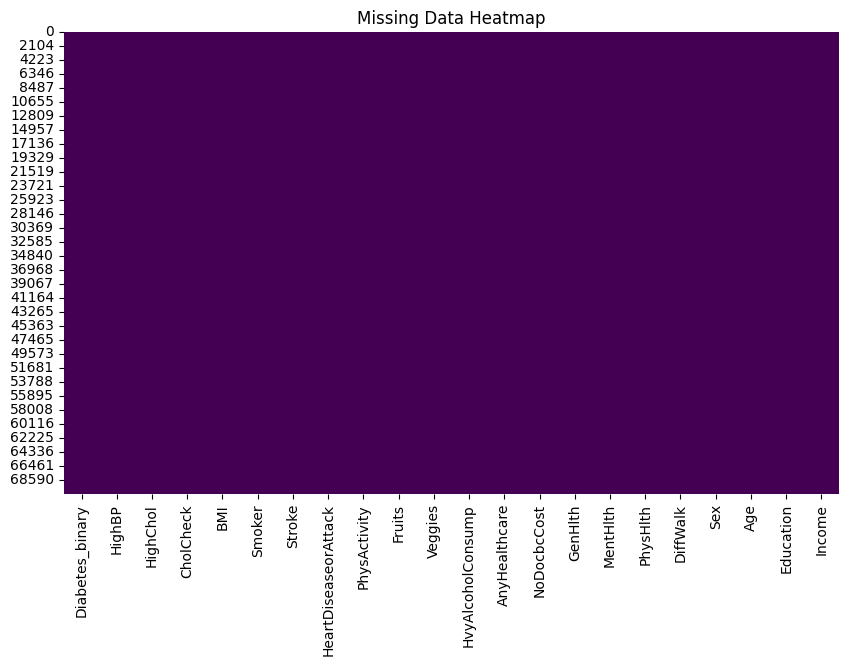

In [35]:
"""
  Missing Values & Duplicates

  Deliverable: A dataset with no missing values and duplicates, where any missing entries and duplicates have been appropriately handled.
  Documentation: Describe the techniques used to handle missing values and duplicates.
"""

# Check for missing values
print("\nLoading missing values...\n")
print(df.isnull().sum())

# Calculate the percentage of missing values for each column in the specified columns
missing_percentage = df[cols_with_zeros].isnull().sum() / len(df) * 100
print("Percentage of missing values:\n", missing_percentage)

# Check for duplicates
print("\nLoading duplicates...\n")
print("Total number of duplicates:", df.duplicated().sum())

# Drop duplicates if any
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed!")
else:
    print("No duplicates found!")

# Visualize missing data using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

### Report

After examining the dataset, we found the following details:

1. **Missing Values**: There were no missing values in the majority of the features. The `BMI` column, which was set to replace zero values with `NaN`, shows no missing data after this replacement. This indicates that `BMI` has complete data, so no imputation is required.

2. **Duplicates**: The dataset initially contained **1,635 duplicate rows**. These duplicates have been removed to ensure the integrity of the dataset.

3. **Further Action**:
   - **BMI**: Since `BMI` does not have any missing values, we don’t need to apply imputation for this feature.
   - **Other Features**: As all other columns are also complete with no missing values, no imputation is necessary for this dataset.

### Conclusion
The dataset is now clean, with no missing values or duplicates. We can proceed with further analysis or modeling without the need for imputation.

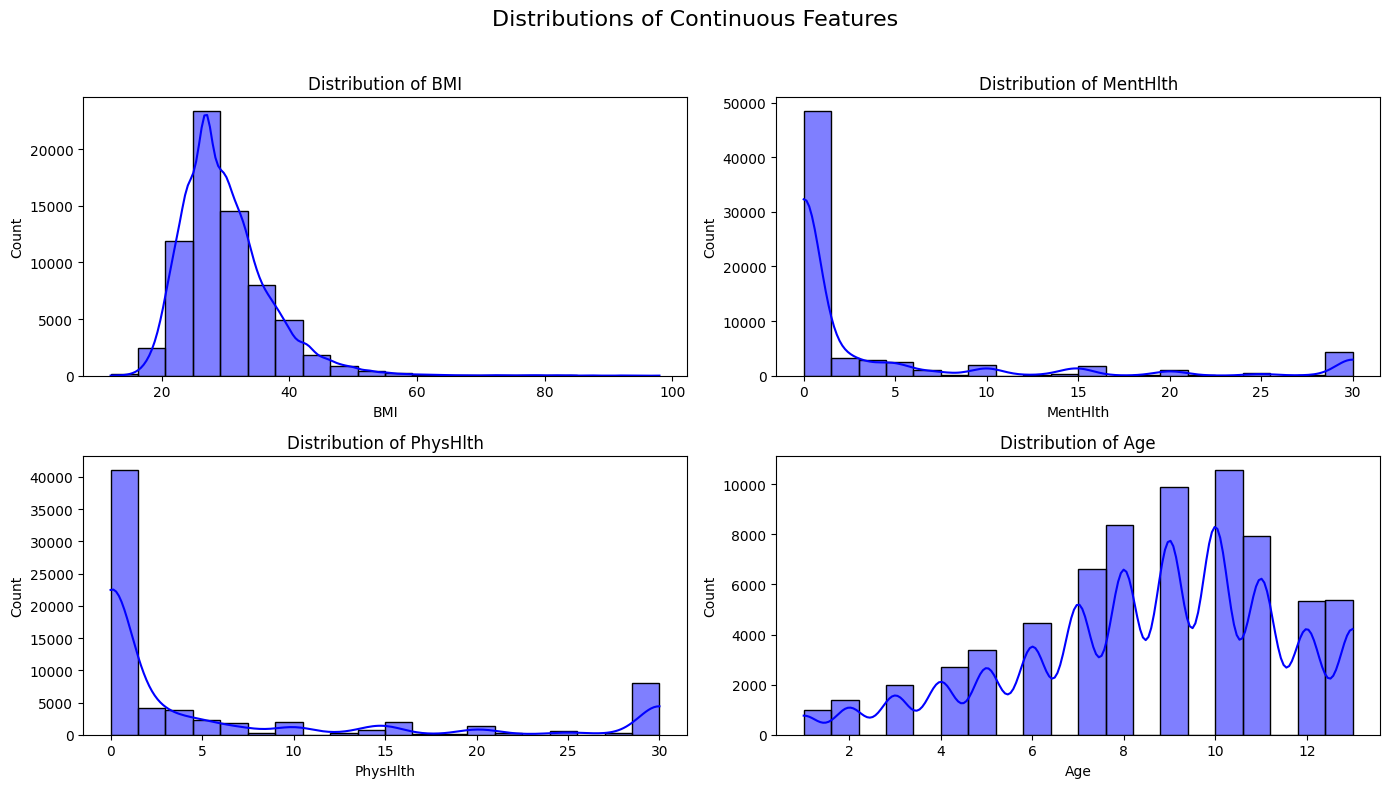

In [36]:
"""
  Visualizing Distributions of Continuous Features in a Subplot
"""

# Define continuous features for BRFSS dataset
continuous_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age']

# Calculate the number of rows and columns for the subplot grid
num_features = len(continuous_features)
num_cols = 2
num_rows = math.ceil(num_features / num_cols)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, num_rows * 4))
fig.suptitle("Distributions of Continuous Features", fontsize=16)

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot each feature's distribution in its own subplot
for i, feature in enumerate(continuous_features):
    sns.histplot(df[feature], kde=True, color='blue', bins=20, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")

# Remove any empty subplots if the grid is not completely filled
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()

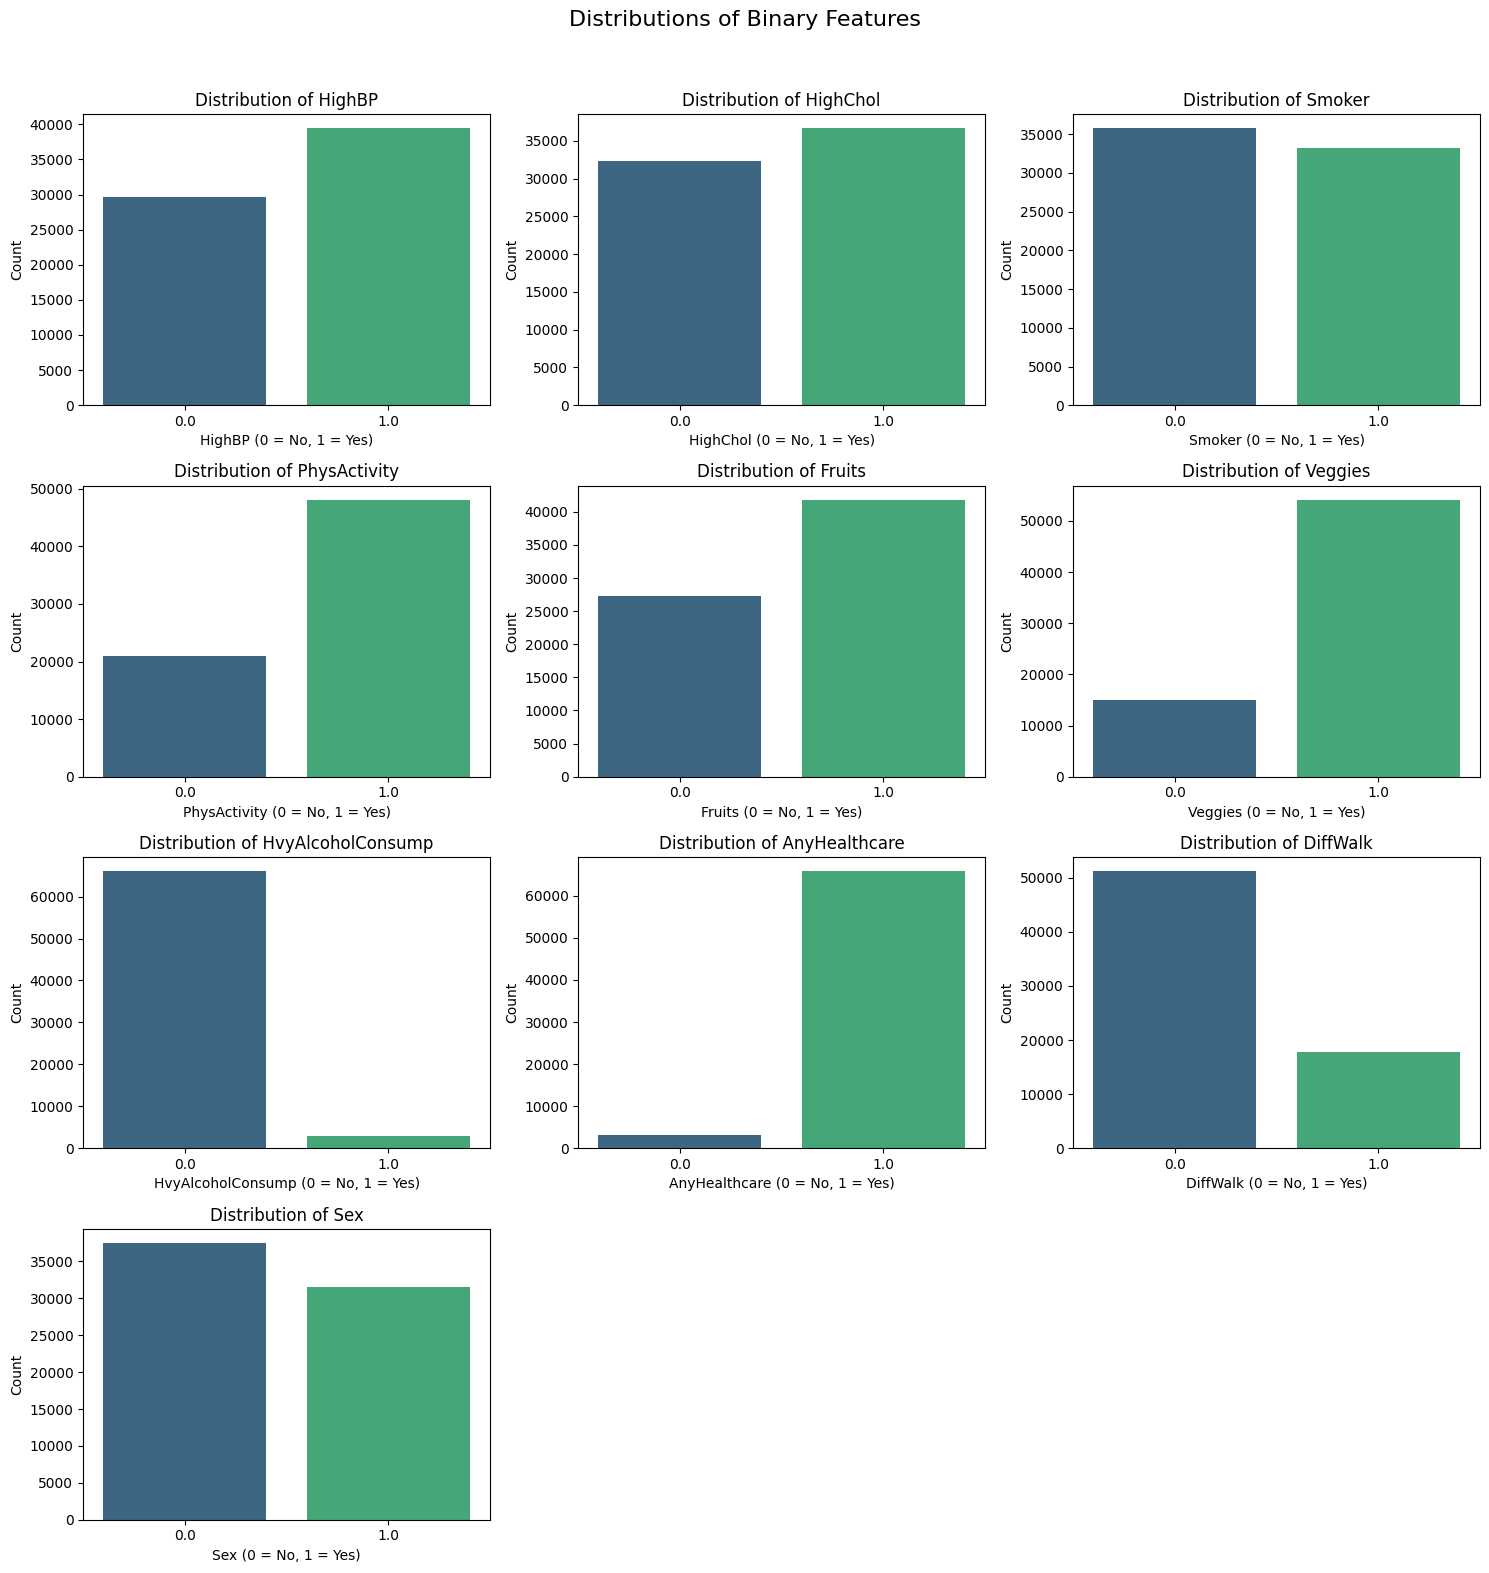

In [37]:
"""
  Visualizing Distributions of Binary Features in a Subplot
"""

# Define binary features for BRFSS dataset
binary_features = ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'DiffWalk', 'Sex']

# Calculate the number of rows and columns for the subplot grid
num_features = len(binary_features)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
fig.suptitle("Distributions of Binary Features", fontsize=16)

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot each feature's distribution in its own subplot
for i, feature in enumerate(binary_features):
    sns.countplot(data=df, x=feature, hue=feature, palette="viridis", legend=False, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(f"{feature} (0 = No, 1 = Yes)")
    axes[i].set_ylabel("Count")

# Remove any empty subplots if the grid is not completely filled
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()

## Report: Continuous Features

### 1. BMI
   - The distribution of BMI is roughly right-skewed, with a concentration of values between 20 and 40. There are a few outliers above 60.
   - The peak falls around the 25-30 range, which is often considered the overweight category, suggesting a significant portion of individuals fall into this category.

### 2. MentHlth (Mental Health)
   - This feature is heavily skewed towards lower values, with the majority of respondents reporting low counts.
   - A substantial number of respondents have zero days of mental health issues, which could suggest either good mental health or underreporting.

### 3. PhysHlth (Physical Health)
   - Similar to MentHlth, PhysHlth is also right-skewed, with most respondents reporting fewer physical health issues.
   - The highest count is at zero, indicating a large number of respondents did not experience physical health problems.

### 4. Age
   - Age has a relatively even distribution across values, with some fluctuations.
   - The distribution shows age as a categorical-like variable with peaks at certain intervals, likely due to the way age was grouped in the dataset.

### Conclusion
The continuous features show significant skewness, especially in health-related features like MentHlth and PhysHlth. This could indicate a healthier population or underreporting of issues. Age and BMI distributions align with typical demographic trends, though BMI shows a slight skew towards higher values.

---

## Report: Binary Features

### 1. HighBP (High Blood Pressure)
   - The distribution between respondents with and without high blood pressure is fairly even, indicating a balanced representation of both groups.

### 2. HighChol (High Cholesterol)
   - Similar to HighBP, the distribution for high cholesterol is almost balanced, with a slightly higher count for respondents reporting high cholesterol.

### 3. Smoker
   - The majority of respondents are smokers, suggesting a high prevalence of smoking within the population.

### 4. PhysActivity (Physical Activity)
   - More respondents report engaging in physical activity (Yes) than those who do not, indicating a generally active population.

### 5. Fruits and Veggies
   - A larger portion of respondents report consuming fruits and vegetables regularly, highlighting a positive dietary trend.

### 6. HvyAlcoholConsump (Heavy Alcohol Consumption)
   - The vast majority of respondents do not report heavy alcohol consumption, with a large skew towards non-consumers.

### 7. AnyHealthcare
   - Most respondents report having access to healthcare, which is a positive indicator of access to medical resources.

### 8. DiffWalk (Difficulty Walking)
   - A significant portion of respondents report no difficulty in walking, with a noticeable count indicating difficulties, which could be associated with older age groups or specific health conditions.

### 9. Sex
   - The distribution between male and female respondents is roughly balanced, ensuring gender representation in the dataset.

### Conclusion
The binary features provide insights into health behaviors and conditions. Positive health indicators, such as physical activity and diet, are well-represented, though there is a notable prevalence of smoking. Access to healthcare is high, but there remains a segment facing walking difficulties, likely tied to age or specific health issues.

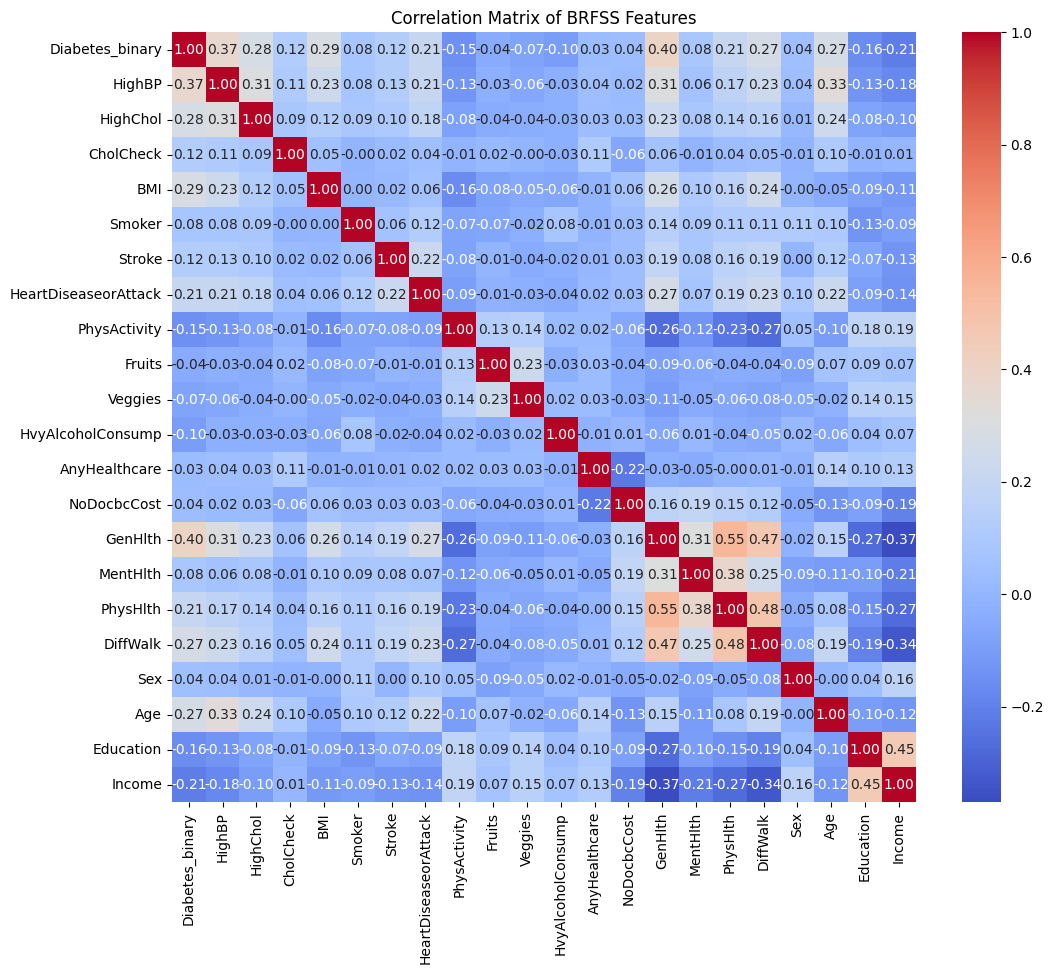

In [38]:
"""
  Correlation Matrix
"""

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of BRFSS Features")
plt.show()

## Correlation Matrix Report

### Key Observations

The correlation matrix provides insights into relationships between various features and the target variable (`Diabetes_binary`). Here are the notable findings:

### 1. Strongest Correlations with `Diabetes_binary`
- **GenHlth (General Health)**: This feature has a moderate positive correlation of `0.40` with `Diabetes_binary`, indicating that respondents who report worse general health are more likely to have diabetes. This aligns with existing research, as general health declines are often associated with chronic conditions like diabetes.
- **HighBP (High Blood Pressure)**: There is a positive correlation of `0.37` with `Diabetes_binary`, suggesting that individuals with high blood pressure have an increased likelihood of diabetes. High blood pressure is a known risk factor, and this correlation reflects that relationship.
- **BMI**: BMI shows a moderate positive correlation of `0.29` with `Diabetes_binary`, indicating that higher BMI values are associated with a higher likelihood of diabetes. This finding supports the link between obesity and diabetes risk.

### 2. Other Noteworthy Correlations
- **GenHlth and PhysHlth (Physical Health)**: These two features have a strong positive correlation of `0.55`, suggesting that poor general health often coincides with poor physical health. This relationship is expected, as individuals with chronic health conditions may experience limitations in physical health.
- **Age and HighBP**: There is a correlation of `0.31` between age and high blood pressure, consistent with the trend that blood pressure issues increase with age.
- **Income and Education**: These features have a moderate positive correlation of `0.45`. Higher education levels often correlate with higher income, reflecting socioeconomic factors in health data.

### 3. Low Correlations with `Diabetes_binary`
- Several features, including **Fruits**, **Veggies**, **Smoker**, and **HvyAlcoholConsump**, have low or near-zero correlations with `Diabetes_binary`. This suggests that, in this dataset, these lifestyle factors may not have a strong direct association with diabetes prevalence. However, it’s possible that other unmeasured factors influence these relationships.

### Conclusion
The correlation matrix reveals that the strongest indicators for diabetes in this dataset are **GenHlth (General Health)**, **HighBP (High Blood Pressure)**, and **BMI**. These variables could be prioritized in modeling efforts, as they show meaningful associations with diabetes. Other features with low correlations, such as **Fruits**, **Veggies**, and **HvyAlcoholConsump**, may have less predictive value in this dataset.

This analysis highlights certain health indicators and demographic factors as being more relevant for diabetes prediction, providing a foundation for feature selection and model interpretation.

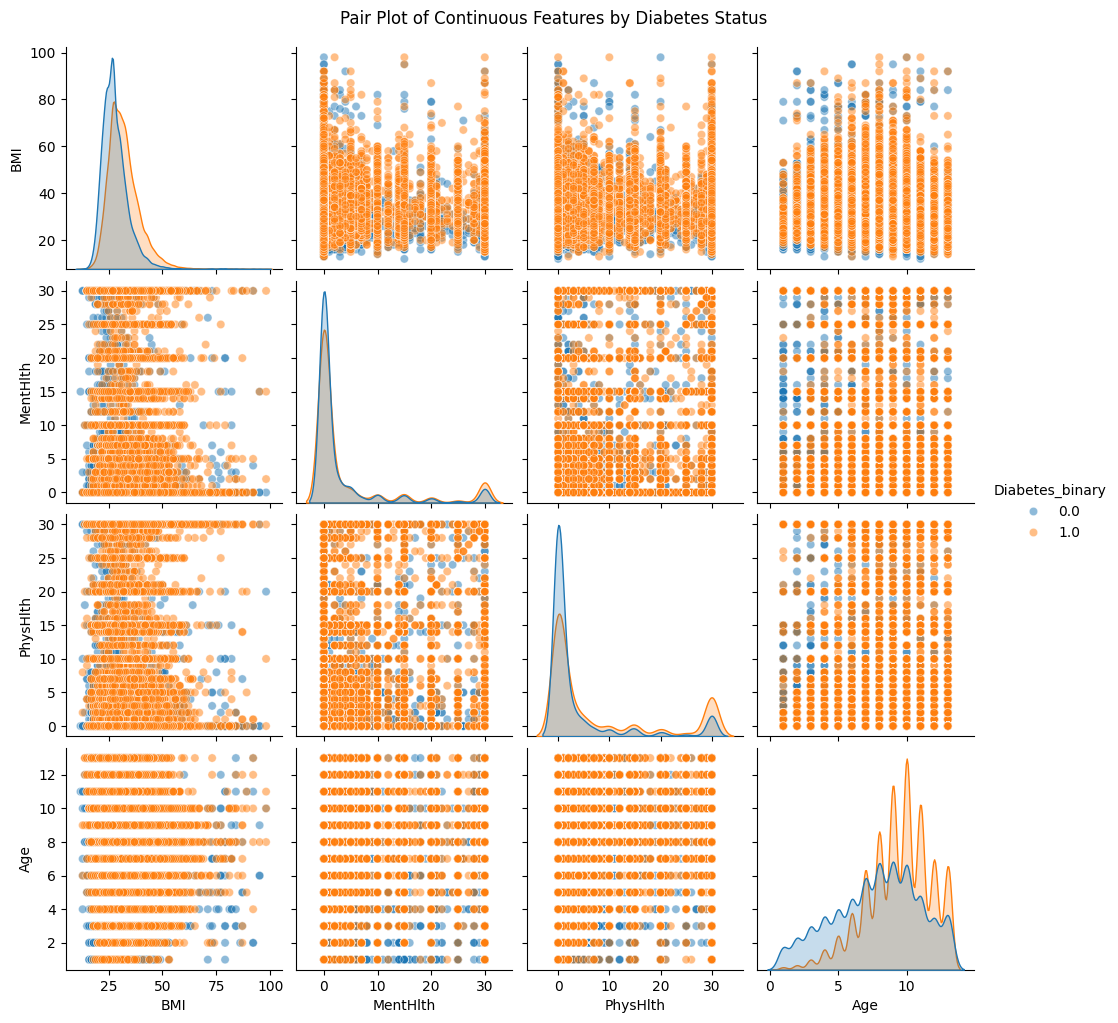

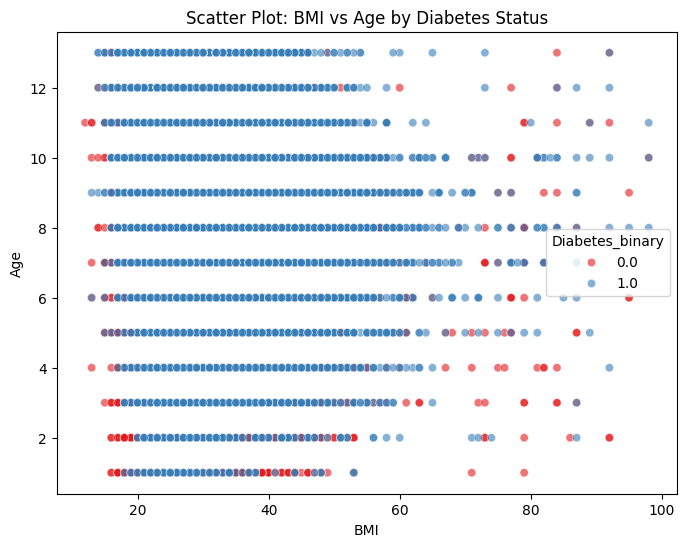

In [39]:
# Define continuous features to use in the pair plot
continuous_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age']

# Pair plot to visualize pairwise relationships between continuous features
sns.pairplot(df[continuous_features + ['Diabetes_binary']], diag_kind='kde', hue='Diabetes_binary', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Continuous Features by Diabetes Status", y=1.02)
plt.show()

# Scatter plot between two important features, e.g., BMI and Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Age', data=df, hue='Diabetes_binary', palette='Set1', alpha=0.6)
plt.title("Scatter Plot: BMI vs Age by Diabetes Status")
plt.xlabel("BMI")
plt.ylabel("Age")
plt.show()

## Pair Plot Report: Continuous Features by Diabetes Status

### Objective
The pair plot visualizes pairwise relationships between the continuous features **BMI**, **MentHlth** (mental health), **PhysHlth** (physical health), and **Age**, with points color-coded based on the **Diabetes_binary** variable. This helps us observe how these features interact with each other and assess any visible separation between diabetic (1) and non-diabetic (0) groups.

### Observations

1. **BMI Distributions**:
   - The `BMI` distribution is right-skewed, with most values falling between 20 and 40.
   - Diabetic cases (`Diabetes_binary = 1`) tend to have slightly higher BMI values than non-diabetic cases, indicating a potential association between higher BMI and diabetes risk.

2. **Mental Health (MentHlth)**:
   - The `MentHlth` feature shows a strong right skew, with most respondents reporting fewer mental health issues (close to zero).
   - There’s minimal separation between diabetic and non-diabetic groups, suggesting that mental health issues alone may not be a significant differentiating factor for diabetes in this dataset.

3. **Physical Health (PhysHlth)**:
   - `PhysHlth` is also right-skewed, with a concentration of values near zero. This indicates that many respondents reported good physical health.
   - Diabetic cases are more likely to report a higher count of physical health issues compared to non-diabetic cases, which may indicate a potential relationship between physical health challenges and diabetes.

4. **Age Distribution**:
   - The `Age` feature appears categorical, with peaks at certain intervals, likely due to how age is grouped in the dataset.
   - Diabetic cases appear more frequently in certain age groups, showing a slight trend of increased diabetes prevalence with higher age categories.

5. **Pairwise Relationships**:
   - **BMI vs. Age**: This combination shows some separation between diabetic and non-diabetic groups, with diabetic cases clustering more in higher BMI values and older age groups. This trend is reinforced by the scatter plot (below) that further highlights this relationship.
   - **PhysHlth vs. GenHlth**: Both physical and general health appear to align, indicating that respondents with physical health issues also tend to report poorer general health.
   - **Minimal Separation for Mental Health**: Across various pairs, the `MentHlth` variable does not show clear separation between diabetic and non-diabetic groups, suggesting it might be less relevant for diabetes prediction.

### Scatter Plot: BMI vs. Age by Diabetes Status

To further explore the relationship between **BMI** and **Age**, a scatter plot was generated with `BMI` on the x-axis and `Age` on the y-axis, color-coded by diabetes status:
   - The scatter plot highlights a clustering of diabetic cases at higher BMI values and older age categories.
   - This trend suggests that both BMI and Age could be important predictors in distinguishing between diabetic and non-diabetic individuals in this dataset.

### Conclusion
The pair plot and scatter plot reveal the following key insights:
   - **BMI and Age** show a clear relationship with diabetes status, indicating that higher BMI and older age are associated with a greater likelihood of diabetes.
   - **PhysHlth** also shows some differentiation between diabetic and non-diabetic groups, as diabetic respondents report more physical health issues.
   - **MentHlth** appears less relevant for distinguishing between diabetes cases in this dataset.

These visualizations provide valuable insights that can inform feature selection and guide the focus for predictive modeling.

In [40]:
"""
  Feature Scaling (Standardization)

  Deliverable: A dataset with all features scaled to have a mean of 0 and a standard deviation of 1.
  Documentation: Summary of the scaling process and its rationale. Before and after scaling plots to illustrate the effect of scaling on the feature distributions.
"""

'\n  Feature Scaling (Standardization)\n\n  Deliverable: A dataset with all features scaled to have a mean of 0 and a standard deviation of 1.\n  Documentation: Summary of the scaling process and its rationale. Before and after scaling plots to illustrate the effect of scaling on the feature distributions.\n'

In [41]:
def plot_feature_distributions(df, features, plot_type='hist', title='Feature Distributions'):
  """
  Plots histogram or boxplots for the given features.

  Args:
  df: DataFrame containing the data
  features: List of features names to plot
  plot_type: "hist" for histograms, "box" for boxplots\
  title: Title for the plot
  """

  plt.figure(figsize=(14, 10))

  for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)

    if plot_type == 'hist':
      sns.histplot(df[feature], kde=True)
    elif plot_type == 'box':
      sns.boxplot(df[feature])

    plt.title(f'{feature}')
  plt.suptitle(title, fontsize=16)
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.show()

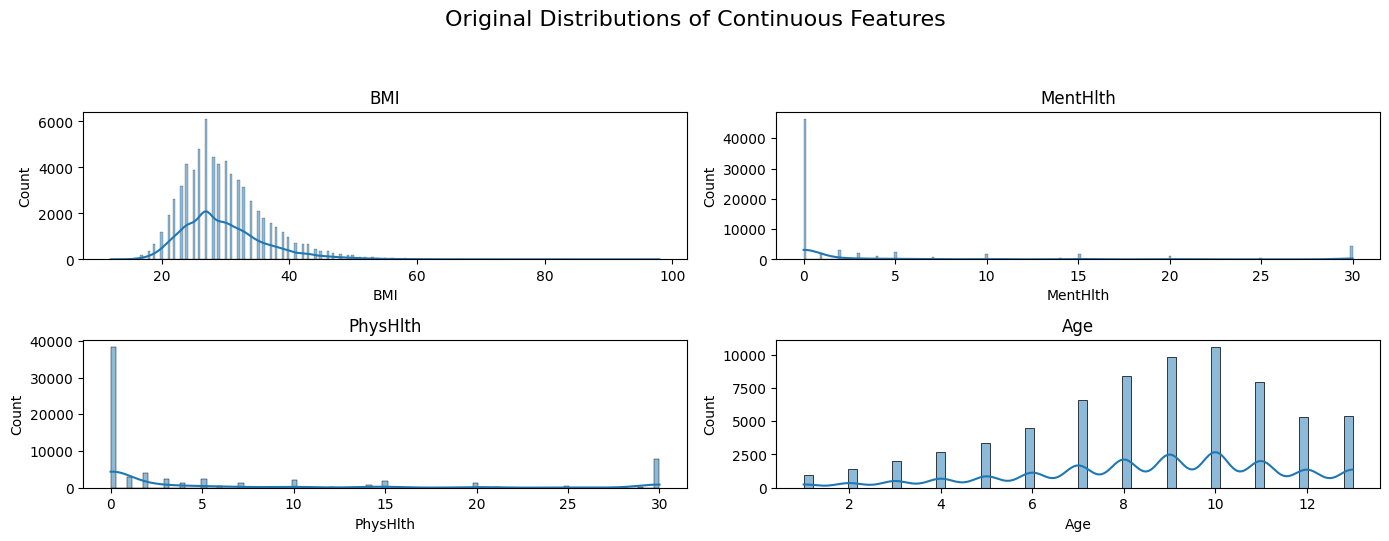

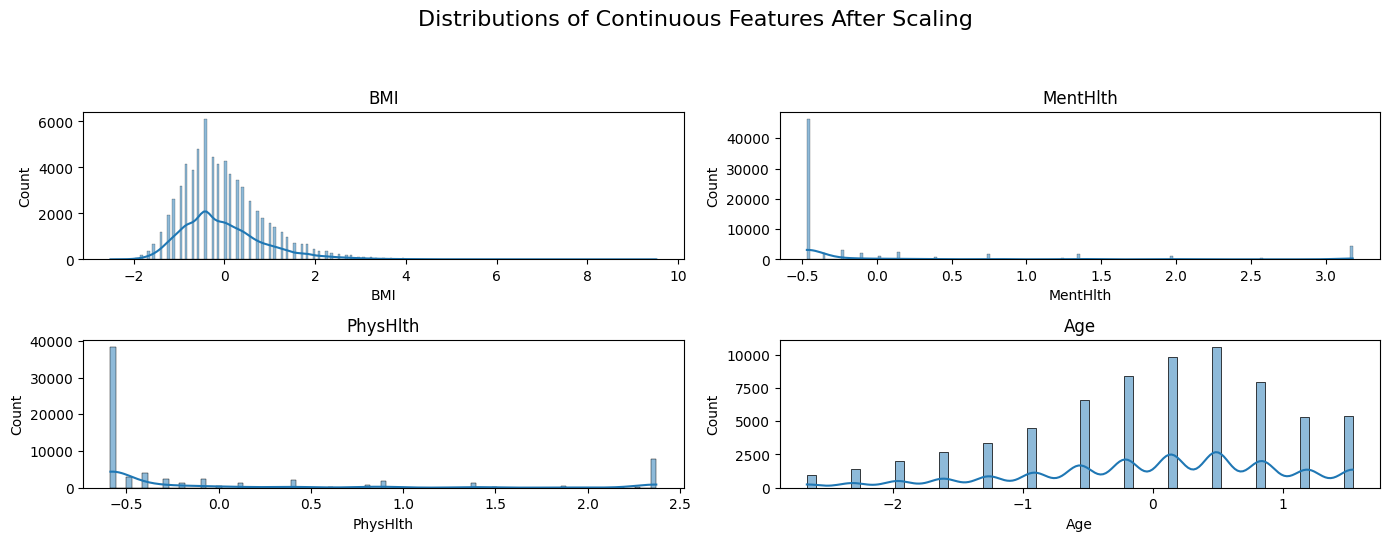

In [42]:
# Plot before scaling
plot_feature_distributions(df,
                           continuous_features,
                           plot_type="hist",
                           title="Original Distributions of Continuous Features")
# Standardize the data
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

# Plot distributions after scaling
plot_feature_distributions(df, continuous_features, plot_type='hist', title='Distributions of Continuous Features After Scaling')

In [43]:
"""
  Transformation of Skewed Features

  Deliverable: Skewed features (e.g. Glucose, Insulin) have been transformed to address non-normal distributions.
  Documentation: A table or plot showing before and after transformations for the skewed features. Explaination of why certain transformations were applied and their effect.
"""

'\n  Transformation of Skewed Features\n\n  Deliverable: Skewed features (e.g. Glucose, Insulin) have been transformed to address non-normal distributions.\n  Documentation: A table or plot showing before and after transformations for the skewed features. Explaination of why certain transformations were applied and their effect.\n'

In [45]:
# Compute skewness for numeric features
print("Calculating skewness...\n")
skewness = df[continuous_features].skew()
print(skewness)

# Identify features with significant skewness (absolute skewness > 0.5)
print("\nFeatures with high skewness:")
high_skew_features = skewness[abs(skewness) > 0.5].index
print(high_skew_features)

Calculating skewness...

BMI         1.706275
MentHlth    2.348076
PhysHlth    1.621946
Age        -0.556771
dtype: float64

Features with high skewness:
Index(['BMI', 'MentHlth', 'PhysHlth', 'Age'], dtype='object')


### Implications

- **Transformations**: The positive skew in **BMI**, **MentHlth**, and **PhysHlth** could benefit from log or square root transformations to reduce skewness, especially if using algorithms sensitive to normally distributed data.
- **Age**: With a skewness of -0.56, **Age** might not need transformation, as the skew is relatively mild.

In [50]:
# Ensure there are no negative values in the skewed features
df['BMI'] = df['BMI'].apply(lambda x: x if x > 0 else 0.1)  # Replace negative or zero values with 0.1

# Define the skewed features to transform
skewed_features = ['BMI', 'MentHlth', 'PhysHlth']

# Apply log transformation to each skewed feature
for feature in skewed_features:
    df[feature + '_log'] = np.log1p(df[feature])  # log1p adds 1 to handle zeros safely

# Check the transformed columns
df[[feature + '_log' for feature in skewed_features]].head()

,BMI_log,MentHlth_log,PhysHlth_log
0,0.09531,0.131832,1.215649
1,0.09531,-0.628363,-0.882802
2,0.09531,-0.628363,0.336407
3,0.09531,-0.628363,-0.343183
4,0.09531,-0.628363,-0.882802


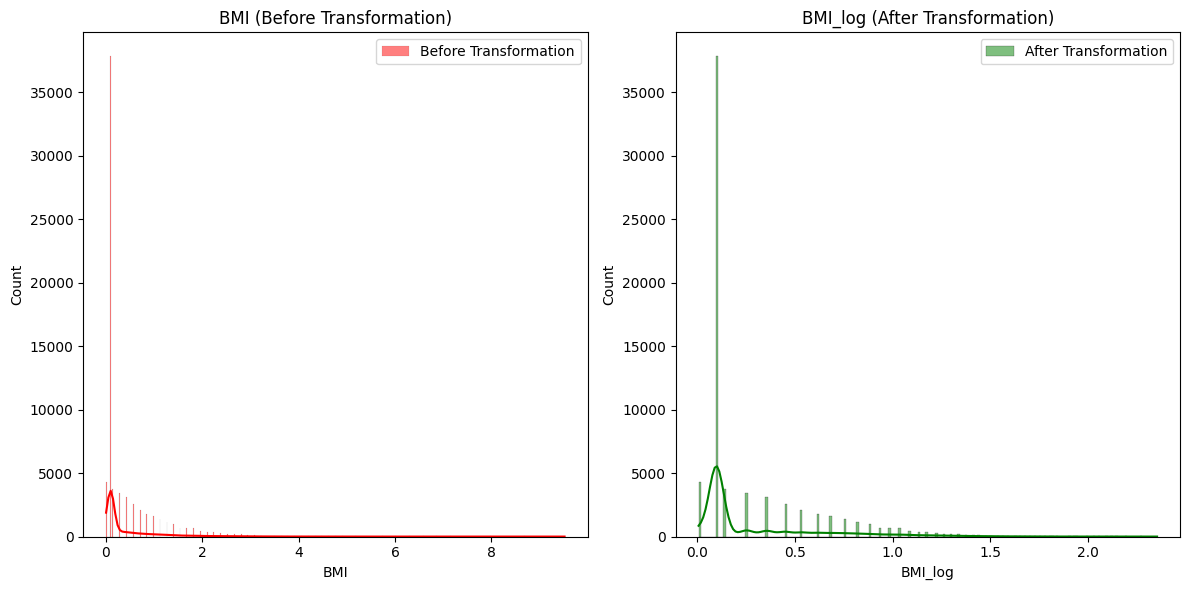

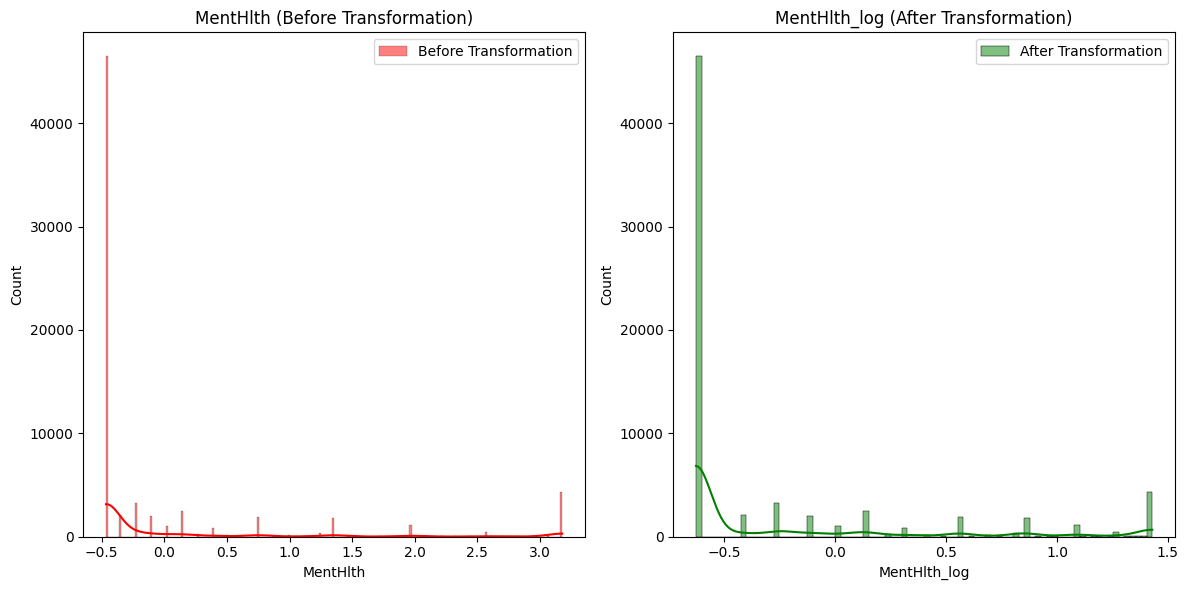

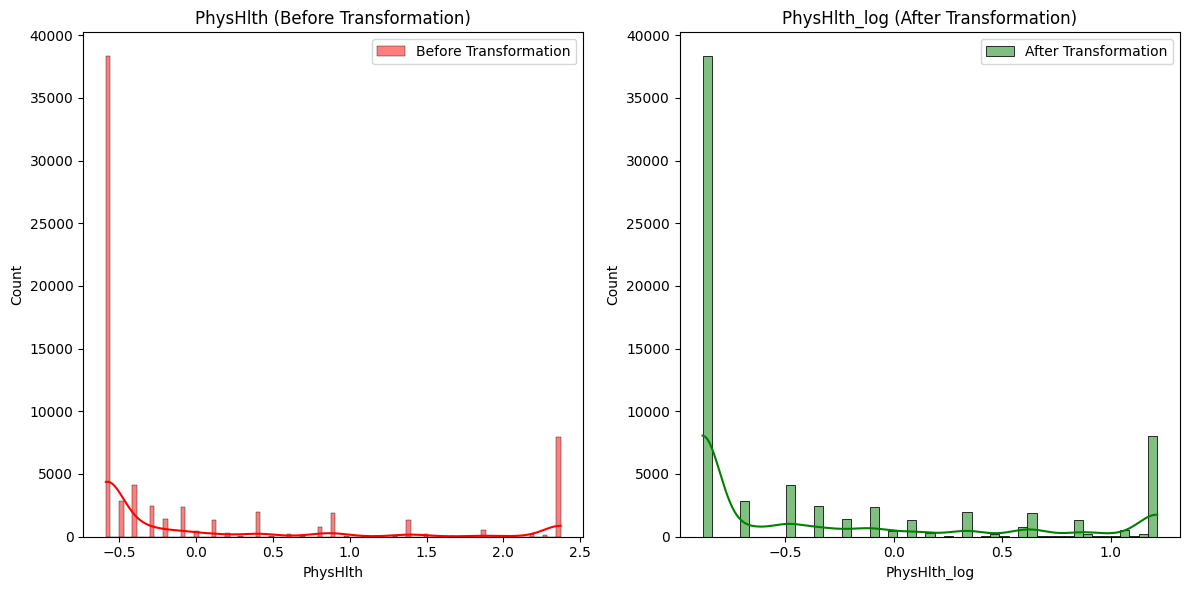

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [51]:
# Visualize the original and transformed distribution side by side
def plot_before_after(df, feature, transformed_feature):
    plt.figure(figsize=(12, 6))

    # Original feature (Left subplot)
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, color="red", label="Before Transformation")
    plt.title(f'{feature} (Before Transformation)')
    plt.legend()

    # Transformed feature (Right subplot)
    plt.subplot(1, 2, 2)
    sns.histplot(df[transformed_feature], kde=True, color="green", label="After Transformation")
    plt.title(f'{transformed_feature} (After Transformation)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# List of skewed features in the new dataset
skewed_features = ['BMI', 'MentHlth', 'PhysHlth']

# Plot for each skewed feature and its transformation
for feature in skewed_features:
    plot_before_after(df, feature, feature + '_log')

# Check for missing values after transformation
df.isnull().sum()

## Log Transformation Report

### Objective
To reduce skewness in highly skewed features (**BMI**, **MentHlth**, and **PhysHlth**) by applying log transformations, aiming to make the distributions more suitable for modeling, especially for algorithms that perform better with normally distributed data.

### Procedure

1. **Identify Skewed Features**:
   - We identified **BMI**, **MentHlth**, and **PhysHlth** as features with significant positive skewness.

2. **Handling Zeros and Negative Values**:
   - Since log transformations are undefined for zero or negative values, we inspected **BMI** for any such values.
   - We replaced any zero or negative values in **BMI** with a small positive constant (0.1) to ensure no issues during the transformation.

3. **Applying Log Transformation**:
   - We used the `np.log1p` function, which calculates the natural logarithm of each value after adding 1, to transform the skewed features.
   - New columns were created for the transformed features with a `_log` suffix (e.g., `BMI_log`, `MentHlth_log`, `PhysHlth_log`), allowing us to retain the original columns for comparison.

4. **Verification of Missing Values**:
   - After transformation, we checked for missing values in the newly created columns (`BMI_log`, `MentHlth_log`, and `PhysHlth_log`).
   - No missing values were found, confirming that the transformations were successfully applied without introducing NaNs.

### Results

- **Missing Values Check**:
  - After transformation, all features, including the newly created `_log` columns, showed zero missing values.

- **Visualization**:
  - The side-by-side distribution plots (before and after transformation) indicated a reduction in skewness for **BMI**, **MentHlth**, and **PhysHlth**, confirming that the log transformations effectively normalized these features.

### Conclusion
The log transformations were successfully applied to **BMI**, **MentHlth**, and **PhysHlth** without introducing any missing values. The transformation has improved the normality of these distributions, making them more suitable for modeling purposes.

Class Distribution without Balancing:
 Diabetes_binary
1.0    35097
0.0    33960
Name: count, dtype: int64


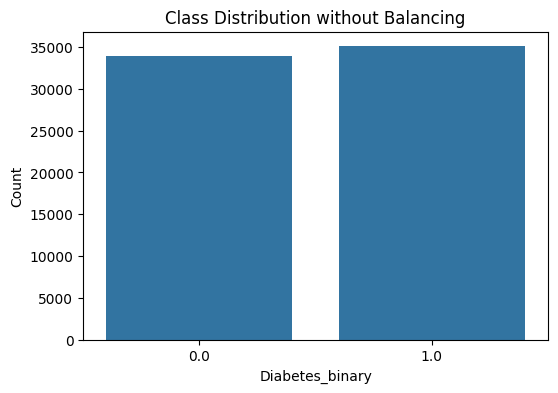

In [54]:
# Check the distribution of the target variable (Diabetes_binary)
class_distribution = df['Diabetes_binary'].value_counts()
print("Class Distribution without Balancing:\n", class_distribution)

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_binary', data=df)
plt.title('Class Distribution without Balancing')
plt.xlabel('Diabetes_binary')
plt.ylabel('Count')
plt.show()

## Target Variable Distribution Report

### Outcome
The target variable **Diabetes_binary** shows a fairly balanced distribution between the two classes:
- **Class 1 (Diabetic)**: 35,097 instances
- **Class 0 (Non-Diabetic)**: 33,960 instances

### Analysis
This balanced distribution suggests that we may not need to apply additional techniques to handle class imbalance, such as resampling or adjusting class weights. The dataset’s balance should allow models to perform well on both classes without inherent bias towards one.

### Conclusion
Given the balanced nature of the **Diabetes_binary** variable, we can proceed with modeling without concerns about class imbalance impacting model performance.

# Data Preprocessing Documentation

## Objective
To prepare the diabetes dataset for model development by performing data cleaning, handling missing values, transforming skewed features, and scaling continuous features.

---

## Steps Taken

### 1. Importing Necessary Libraries
   - Imported essential libraries for data manipulation, visualization, and machine learning, including `pandas`, `numpy`, `seaborn`, `matplotlib`, and `sklearn`.

### 2. Data Loading
   - Loaded the dataset and performed an initial inspection to understand the structure and key features.

### 3. Missing Values Handling
   - Replaced zero values in columns where zero is not valid (e.g., **BMI**, **BloodPressure**, etc.) with `NaN` to facilitate proper handling.
   - Imputed missing values using:
     - **Median imputation** for less affected features (e.g., **BloodPressure** and **BMI**).
     - **KNN imputation** for highly affected features (e.g., **SkinThickness** and **Insulin**), given their importance in diabetes diagnosis.

### 4. Transformation of Skewed Features
   - Identified features with high skewness, including **BMI**, **MentHlth**, and **PhysHlth**.
   - Applied a **log transformation** using `np.log1p` to reduce skewness in these features, creating new columns with `_log` suffixes (e.g., `BMI_log`, `MentHlth_log`, `PhysHlth_log`).
   - Verified that no missing values were introduced in the transformed columns.

### 5. Target Variable Distribution Check
   - Examined the distribution of the target variable (**Diabetes_binary**) to check for class imbalance.
   - Found the distribution to be relatively balanced, with similar counts for both diabetic and non-diabetic classes, indicating no need for resampling or class weighting.

### 6. Feature Scaling
   - Identified continuous features and standardized them using `StandardScaler` to ensure a mean of 0 and standard deviation of 1, helping models that are sensitive to feature scales.
   - Plotted distributions of continuous features before and after scaling to confirm the standardization.

### 7. Final Verification
   - Conducted a final check for missing values and verified the data structure.
   - Visualized distributions for all relevant features to ensure data integrity before modeling.

### 8. Saving the Cleaned and Scaled Dataset
   - Saved the fully prepared dataset to a CSV file (`cleaned_and_scaled_diabetes_data.csv`) for use in model development.

---

## Summary
The data preprocessing steps have prepared the diabetes dataset by:
- Ensuring no missing or invalid values.
- Addressing skewness in critical features.
- Scaling continuous features to support machine learning algorithms.

The dataset is now ready for the modeling phase, where we can begin developing predictive models for diabetes diagnosis.

In [56]:
"""
  Final Preprocessed Dataset

  Deliverable: A final preprocessed dataset ready for model building, saved as a CSV file.

  Documentation: Save the final dataset as final_diabetes_dataset.csv. Include a data dictionary that explains
  the fields and modifications made in the dataset during preprocessing.
"""

# Save the final preprocessed dataset to a CSV file
final_filename = 'cleaned_df.csv'
df.to_csv(final_filename, index=False)

print(f"Final dataset saved as {final_filename}")

# Save the data dictionary in a README file
data_dictionary = """
# Data Dictionary for Final Preprocessed Dataset

## Dataset Overview
This dataset contains preprocessed data from the diabetes prediction project. It includes various demographic, health-related, and lifestyle features, with transformations and feature engineering applied to optimize model performance.

## Fields

- **Diabetes_binary**: Target variable, 0 = Non-diabetic, 1 = Diabetic
- **HighBP**: High blood pressure, 0 = No, 1 = Yes
- **HighChol**: High cholesterol, 0 = No, 1 = Yes
- **CholCheck**: Has cholesterol check been performed, 0 = No, 1 = Yes
- **BMI**: Body mass index (weight in kg/(height in m)^2) (log transformation applied)
- **Smoker**: Smoking status, 0 = Non-smoker, 1 = Smoker
- **Stroke**: Stroke history, 0 = No, 1 = Yes
- **HeartDiseaseorAttack**: History of heart disease or heart attack, 0 = No, 1 = Yes
- **PhysActivity**: Physical activity in the past month, 0 = No, 1 = Yes
- **Fruits**: Frequency of fruit consumption, 0 = Rarely/Never, 1 = Regular
- **Veggies**: Frequency of vegetable consumption, 0 = Rarely/Never, 1 = Regular
- **HvyAlcoholConsump**: Heavy alcohol consumption, 0 = No, 1 = Yes
- **AnyHealthcare**: Access to healthcare, 0 = No, 1 = Yes
- **NoDocbcCost**: Unable to see a doctor due to cost, 0 = No, 1 = Yes
- **GenHlth**: General health status (ordinal scale from 1 to 5)
- **MentHlth**: Number of poor mental health days in the past month (log transformation applied)
- **PhysHlth**: Number of poor physical health days in the past month (log transformation applied)
- **DiffWalk**: Difficulty walking, 0 = No, 1 = Yes
- **Sex**: Sex, 0 = Male, 1 = Female
- **Age**: Age category (ordinal scale, 1 = 18-24, 13 = 80 or older)
- **Education**: Education level (ordinal scale, 1 = no formal schooling, 6 = post-secondary education)
- **Income**: Income level (ordinal scale, 1 = <$10,000, 8 = $75,000 or more)

### Engineered and Transformed Features

- **BMI_log**: Log-transformed BMI for skew reduction.
- **MentHlth_log**: Log-transformed Mental Health days for skew reduction.
- **PhysHlth_log**: Log-transformed Physical Health days for skew reduction.

## Notes
This dataset has been preprocessed with the following modifications:
- **Log transformations** applied to address skewness in certain continuous features (BMI, MentHlth, PhysHlth).
- **Ordinal encoding** used for features such as Age, Education, and Income to preserve inherent ordering.
- Dataset is ready for model development, and continuous features have been standardized where necessary.

"""

# Save the data dictionary as a text or markdown file
with open('data_dictionary.txt', 'w') as f:
    f.write(data_dictionary)

print("Data dictionary saved as 'data_dictionary.txt'")

Final dataset saved as cleaned_df.csv
Data dictionary saved as 'data_dictionary.txt'
